**Hands-on Session on ResNet50**

**A brief overview on ResNet 50**

**ResNet50** is a deep convolutional neural network with 50 layers, renowned for its Residual Learning framework, which allows training of very deep networks by mitigating the vanishing gradient problem. It was trained on the ImageNet dataset, containing over a million images across 1,000 classes.

**Residual Blocks:** Residual blocks in ResNet50 are key components that enable deep networks to learn efficiently. They introduce shortcut connections, allowing the network to bypass layers, mitigating the vanishing gradient problem and enabling training of very deep architectures by learning residual (difference) mappings.

**Vanishing/Exploding Gradient in Deep Neural Networks:** Vanishing and exploding gradient problems occur in deep neural networks during backpropagation. Gradients shrink (vanish) or grow (explode) exponentially across layers, causing slow learning or unstable updates. This makes training deep networks challenging, hindering convergence and model performance, especially in earlier layers.

**Skip Connections:** Skip connections, as used in ResNet, bypass layers by directly connecting the input of a layer to a later layer, allowing gradients to flow more easily. This mitigates vanishing and exploding gradients, enabling stable training of very deep networks by preserving information across layers.

**Batch normalization:** Batch Normalization is a technique that normalizes the inputs to each layer, ensuring that they have a consistent distribution (mean 0, variance 1). This stabilizes and accelerates training by reducing internal covariate shift, allowing for faster convergence and higher learning rates.

**Role of Batch Normalization in ResNet 50:** In **ResNet50**, batch normalization is applied after every convolution layer and before the activation function (ReLU). It helps maintain stable gradient flows across the deep network, contributing to better performance and faster training.

**Role of ID Blocks in ResNet 50:** ID (Identity) blocks in ResNet50 are residual blocks where the input is passed unchanged via a shortcut connection. These blocks add the input directly to the output of convolutional layers, helping to preserve information and improve gradient flow, facilitating the training of deep networks.

**Base Model in ResNet:** A base model in ResNet is the foundational architecture featuring residual connections and convolutional layers for effective feature extraction. It serves as a backbone for various tasks, allowing for transfer learning with pretrained versions like ResNet50, ResNet101, or ResNet152.

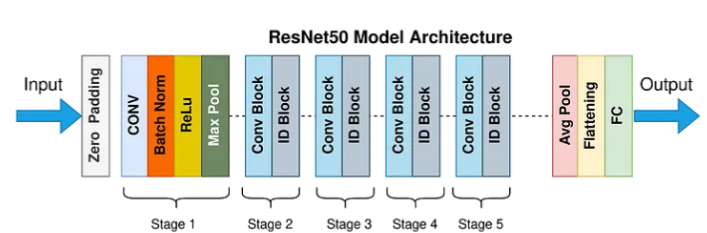

**Figure:** ResNet Model Architecture (Picture Courtesy: Original Source / https://towardsdatascience.com/)

**Description of ImageNet Dataset:** The ImageNet dataset consists of over 14 million labeled images across 20,000 categories, widely used for image classification tasks. It contains approximately 1,000 classes, providing a benchmark for training and evaluating deep learning models, including popular architectures like ResNet and VGG.

**Key Features:**

**Architecture:** 50 layers deep with residual blocks.

**Weights:** Pretrained on ImageNet, capturing rich feature representations.

**Usage:** Ideal for transfer learning in various image classification tasks.

**Flexibility:** Can be fine-tuned or used as a fixed feature extractor.

**Why ResNet50?**

1. Proven high performance on image classification benchmarks.

2. Efficient training due to residual connections.
3. Versatile for both feature extraction and fine-tuning.

**Applications of ResNet50:** ResNet50 is widely used in image classification, object detection, and medical imaging. Its deep architecture with residual connections enables accurate feature extraction, making it ideal for tasks like facial recognition, autonomous driving, and analyzing complex visual data such as X-rays or CT scans.

**Step 1:  Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

**Step 2: Loading and Preprocessing the Dataset**

**CIFAR-10:** CIFAR-10 is a popular dataset containing 60,000 32x32 color images across 10 classes, such as Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship and Truck. It has 50,000 training and 10,000 test images, commonly used for benchmarking image classification algorithms in deep learning.

In [2]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


**Step 3: Visualize Sample Images**

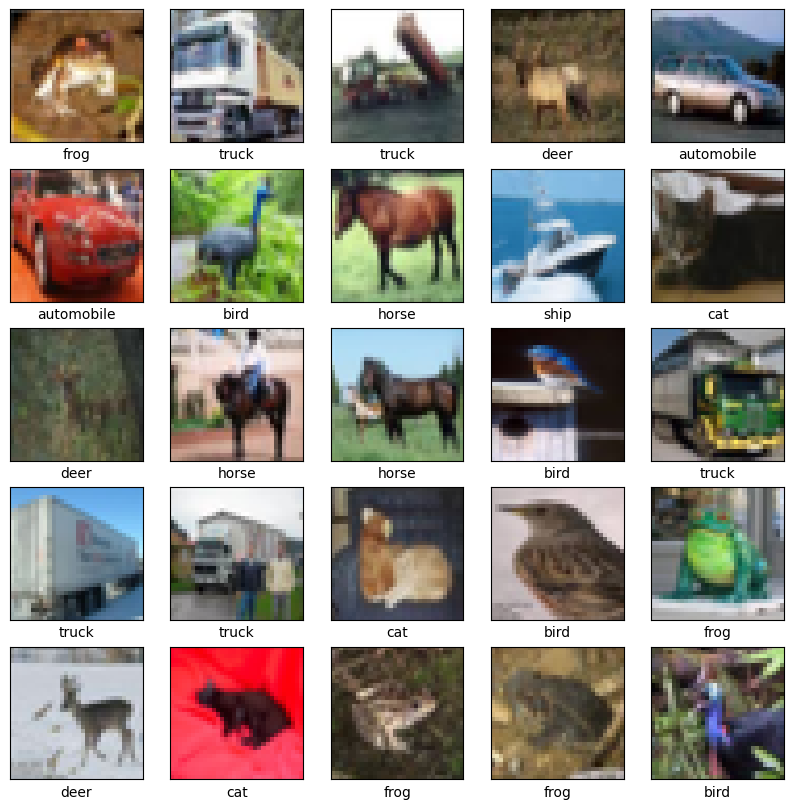

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

**Step 4: Loading a Pretrained Model** (Using ResNet50 without Top Layers)

In [4]:
# Load ResNet50 with pretrained ImageNet weights, excluding the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

base_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

**Note:** **Trainable parameters** in a model are those that can be optimized during training, such as weights and biases. **Non-trainable parameters**, on the other hand, remain fixed and are not updated, often including settings like batch normalization statistics and dropout rates.

**Step 5: Building the Classification Model** (Add Custom Layers on Top of ResNet50)

In [5]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

#model.summary()

**Compile the Model:**

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Step 6: Training the Model** (Using Data Augmentation for Better Generalization)

In [7]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the data generator on the training data
datagen.fit(train_images)

# Define training parameters
batch_size = 64                                                #Batch size is the number of training samples processed before the model's weights are updated. It influences training speed, memory usage, and model convergence, balancing between accuracy and efficiency in deep learning.
epochs = 10

# Train the model using the data generator
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),        #This method generates batches of tensor image data with real-time data augmentation. The datagen object is typically an instance of ImageDataGenerator, which applies transformations to images during training, such as rotation, scaling, and flipping.
                    steps_per_epoch=len(train_images) // batch_size,                        #This argument defines how many batches of samples to use in each epoch. The steps_per_epoch is calculated by dividing the total number of training images (len(train_images)) by the batch_size. This ensures that the entire training dataset is used once per epoch.
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 66s 68ms/step - accuracy: 0.1158 - loss: 2.3607 - val_accuracy: 0.1909 - val_loss: 2.1836
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.1875 - loss: 2.1888

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1875 - loss: 2.1888 - val_accuracy: 0.1952 - val_loss: 2.1815
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 67s 60ms/step - accuracy: 0.1459 - loss: 2.2228 - val_accuracy: 0.2057 - val_loss: 2.1608
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1562 - loss: 2.2010 - val_accuracy: 0.2051 - val_loss: 2.1673
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.1433 - loss: 2.2050 - val_accuracy: 0.2135 - val_loss: 2.1103
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2188 - loss: 2.1533 - val_accuracy: 0.2049 - val_loss: 2.1100
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.1563 - loss: 2.1916 - val_accuracy: 0.2407 - val_loss: 2.0801
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1719 - loss: 2.1865 - val_accuracy: 0.2374 - val_loss: 2.0894
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.1538 - loss: 2.1882 - val_accuracy: 0.238

**Visualize Training History:**

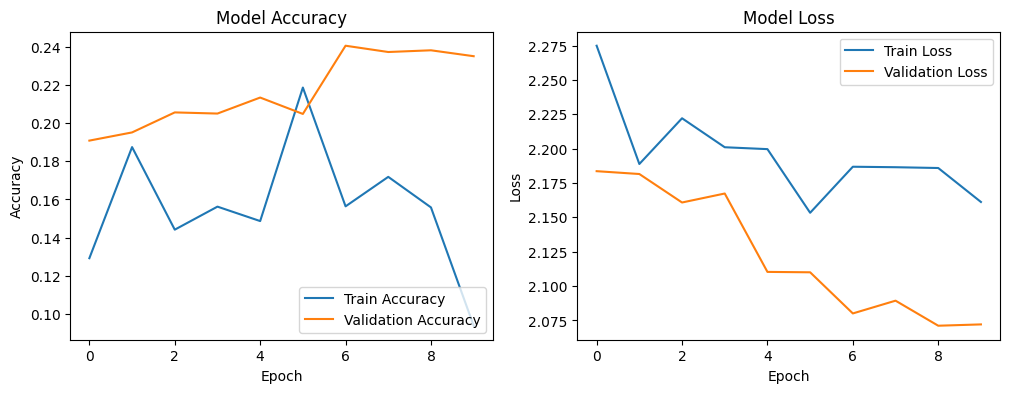

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

The image contains two line graphs that illustrate the performance of a deep learning model over 10 epochs of training.

**Insights**
- **Accuracy**: The model's accuracy on both training and validation data fluctuates, indicating variability in performance across epochs.
- **Loss**: The loss values show how well the model is learning. The fluctuations suggest that the model might be experiencing overfitting or underfitting issues.

These graphs help in diagnosing the model's learning behavior and generalization capability.

**Step 7: Evaluating the Model** (Evaluate on Test Data)

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)    #This part of the code unpacks the output of the evaluate method from the model. The evaluate method returns two values: the loss of the model on the test data (test_loss) and the accuracy of the model on the test data (test_acc). verbose=2: This argument controls the verbosity of the output during evaluation. A value of 2 will display detailed logs for each batch processed during evaluation, including loss and accuracy metrics.
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

313/313 - 2s - 6ms/step - accuracy: 0.2352 - loss: 2.0721

Test accuracy: 23.52%


**Fine-Tuning:** After training the top layers, you can unfreeze some layers of the base model and continue training with a lower learning rate to fine-tune the entire network for potentially better performance.

In [10]:
# Unfreeze the base model
base_model.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),        #datagen.flow(...): This method generates batches of tensor image data with real-time data augmentation. The datagen object is typically an instance of ImageDataGenerator, which applies transformations to images during training, such as rotation, scaling, and flipping.
                         steps_per_epoch=len(train_images) // batch_size,                        #This argument defines how many batches of samples to use in each epoch. The steps_per_epoch is calculated by dividing the total number of training images (len(train_images)) by the batch_size. This ensures that the entire training dataset is used once per epoch.
                         epochs=5,
                         validation_data=(test_images, test_labels))


Epoch 1/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 135s 102ms/step - accuracy: 0.1379 - loss: 3.6861 - val_accuracy: 0.1325 - val_loss: 7.1231
Epoch 2/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2656 - loss: 2.2477 - val_accuracy: 0.1322 - val_loss: 7.1158
Epoch 3/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 88s 66ms/step - accuracy: 0.2378 - loss: 2.3187 - val_accuracy: 0.3927 - val_loss: 1.7551
Epoch 4/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3438 - loss: 1.9602 - val_accuracy: 0.3936 - val_loss: 1.7545
Epoch 5/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.3272 - loss: 1.9194 - val_accuracy: 0.4822 - val_loss: 1.5261


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

313/313 - 2s - 7ms/step - accuracy: 0.4822 - loss: 1.5261

Test accuracy: 48.22%


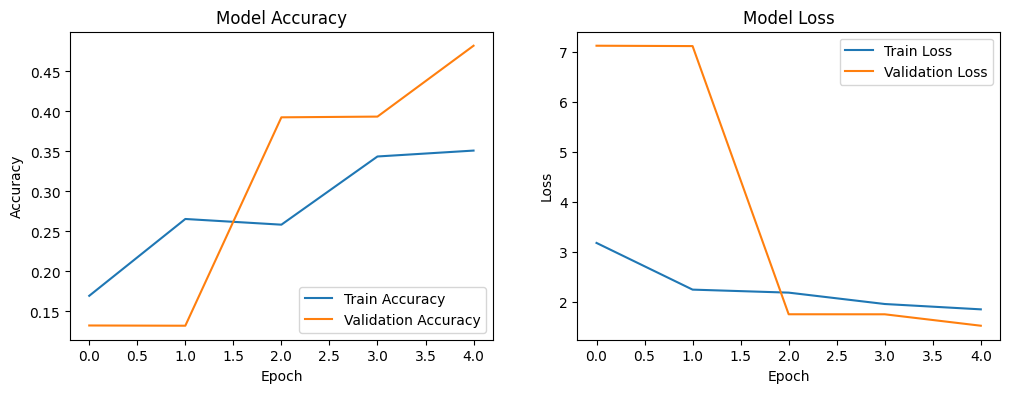

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

The figure contains two line graphs that illustrate the performance of a deep learning model over five epochs of training.

**Insights**

**Accuracy:** The model’s accuracy on both training and validation data improves initially, but the validation accuracy’s fluctuations suggest that the model’s generalization to new data is inconsistent.

**Loss:** The loss values show how well the model is learning. The initial decrease in both train and validation loss is a good sign, but the slight increase in validation loss later on could indicate overfitting.

These graphs help diagnose the model’s learning behavior and generalization capability.

**Saving the Model:** Save your trained model for future use.

In [13]:
model.save('my_model.keras')

**Assignment:** In this hands-on demonstration, I have shown you how to apply the ResNet50 architecture over the CIFAR-10 dataset. Also, I have shown you how to finetune the entire network to optimize the model performance. Here, your task will be to improve the accuracy by adjusting the hyperparameters such as batch size, learning rate, and number of epochs to optimize model performance. Also, explore fine-tuning techniques and advanced data augmentation strategies to enhance your model’s accuracy.